
The Salary Dataset contains **6704 rows** and **6 columns** containing the following data:

1. **Age**
2. **Gender**
3. **Education Level**
4. **Job Title**
5. **Years of Experience**
6. **Salary**

First we pre-process, clean and model the data to standardize and structure it.


In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import statsmodels.api as sm

In [2]:
# Importing Data

df = pd.read_csv('/Users/ayman/Desktop/job-salary-prediction/data/Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
# Checking for null data

df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
# Dropping null values from database

df.dropna(inplace=True)

In [7]:
# Checking unique value counts of Job Titles in the database

df['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

In [8]:
# Reducing Job titles by omitting titles with less than 25 counts

job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

142

In [9]:
# Omitting titles with less than 25 counts

df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

50

In [10]:
#Checking unique value count of Education Level

df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [11]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [12]:
# Checking Unique Value count of Gender

df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

<h1>Exploratory Data Analysis<h1>

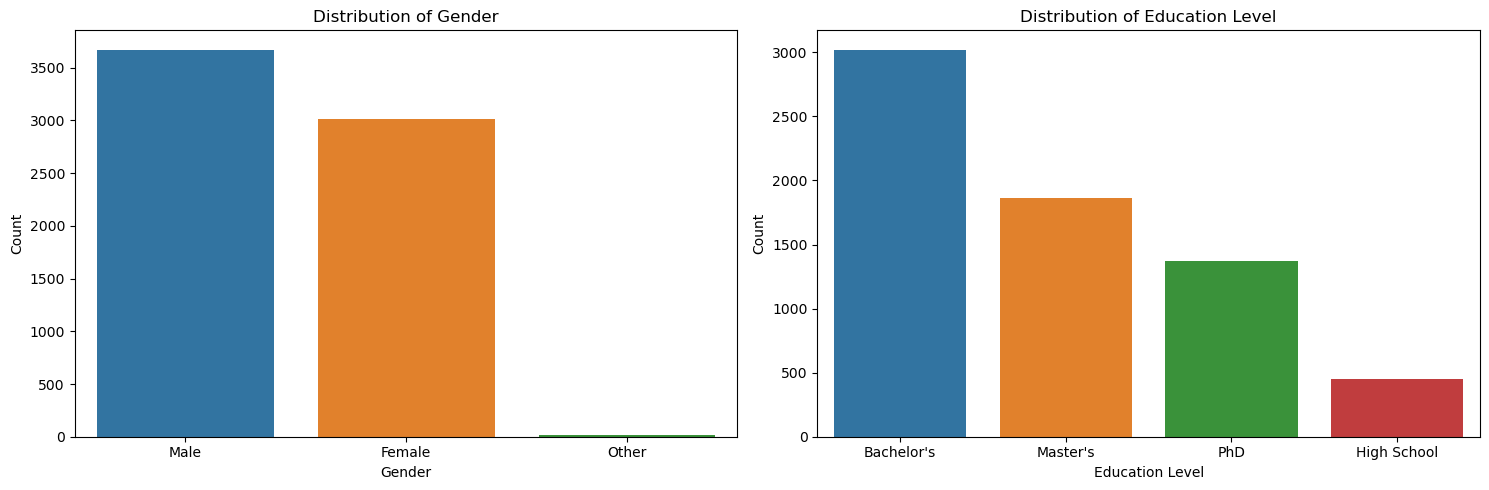

In [13]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=df, ax=ax[0])

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education Level', data=df, ax=ax[1])

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

**Distribution of Gender and Education Level**
    
1. **Distribution of Gender:** The job market is mostly dominated by males with females being second largest group and extremely few people from the third gender. This shows that while women are slowly becoming a part of the workforce, people belonging to other genders do have very few opportunities.
    
2. **Distribution of Education Level:** A majority of working professionals hold a bachelor's degree followed by master's and PhD holders with least hireable being just High school graduates. This means a bachelor's degree is sufficient to enter the workforce and highly in demand by employers.


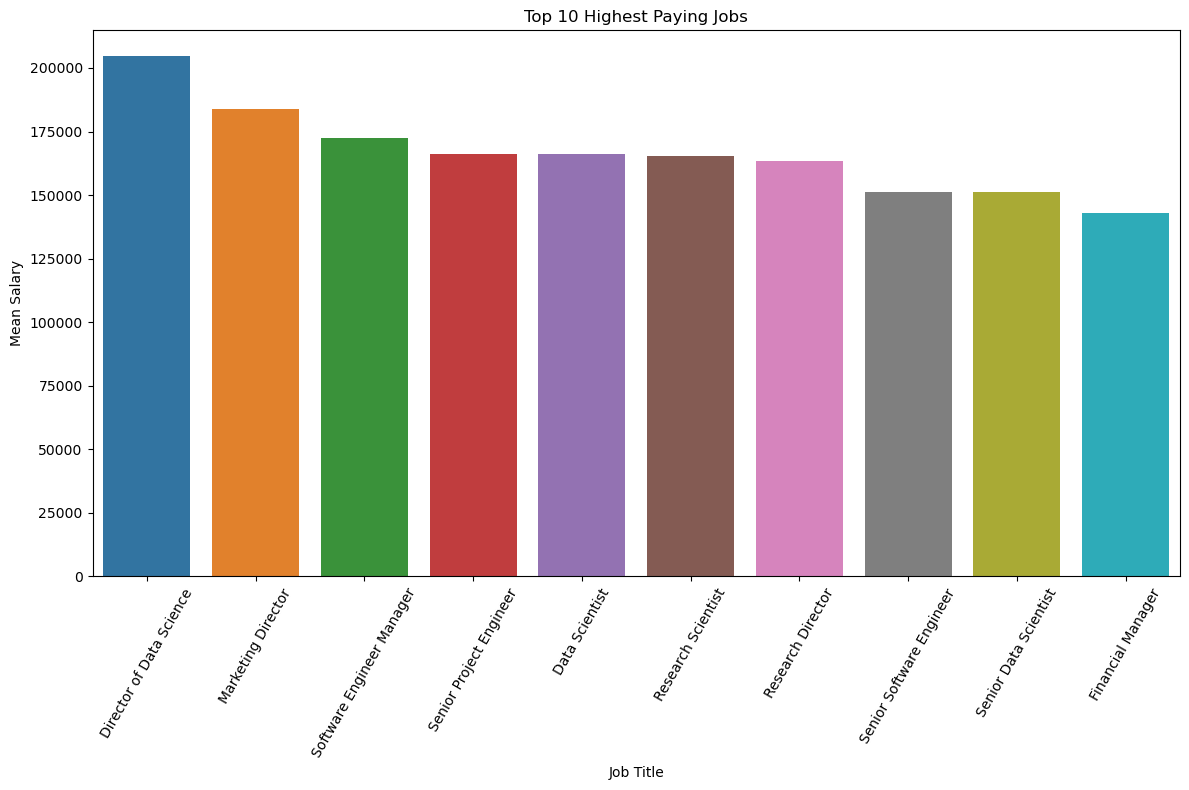

In [14]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

**Top 10 Highest Paying Jobs**
    
The plot shows the Top 10 highest paying jobs in the industry plotted against the mean salary offered for the role. We can see that Data Scientists and Engineers are paid the highest.

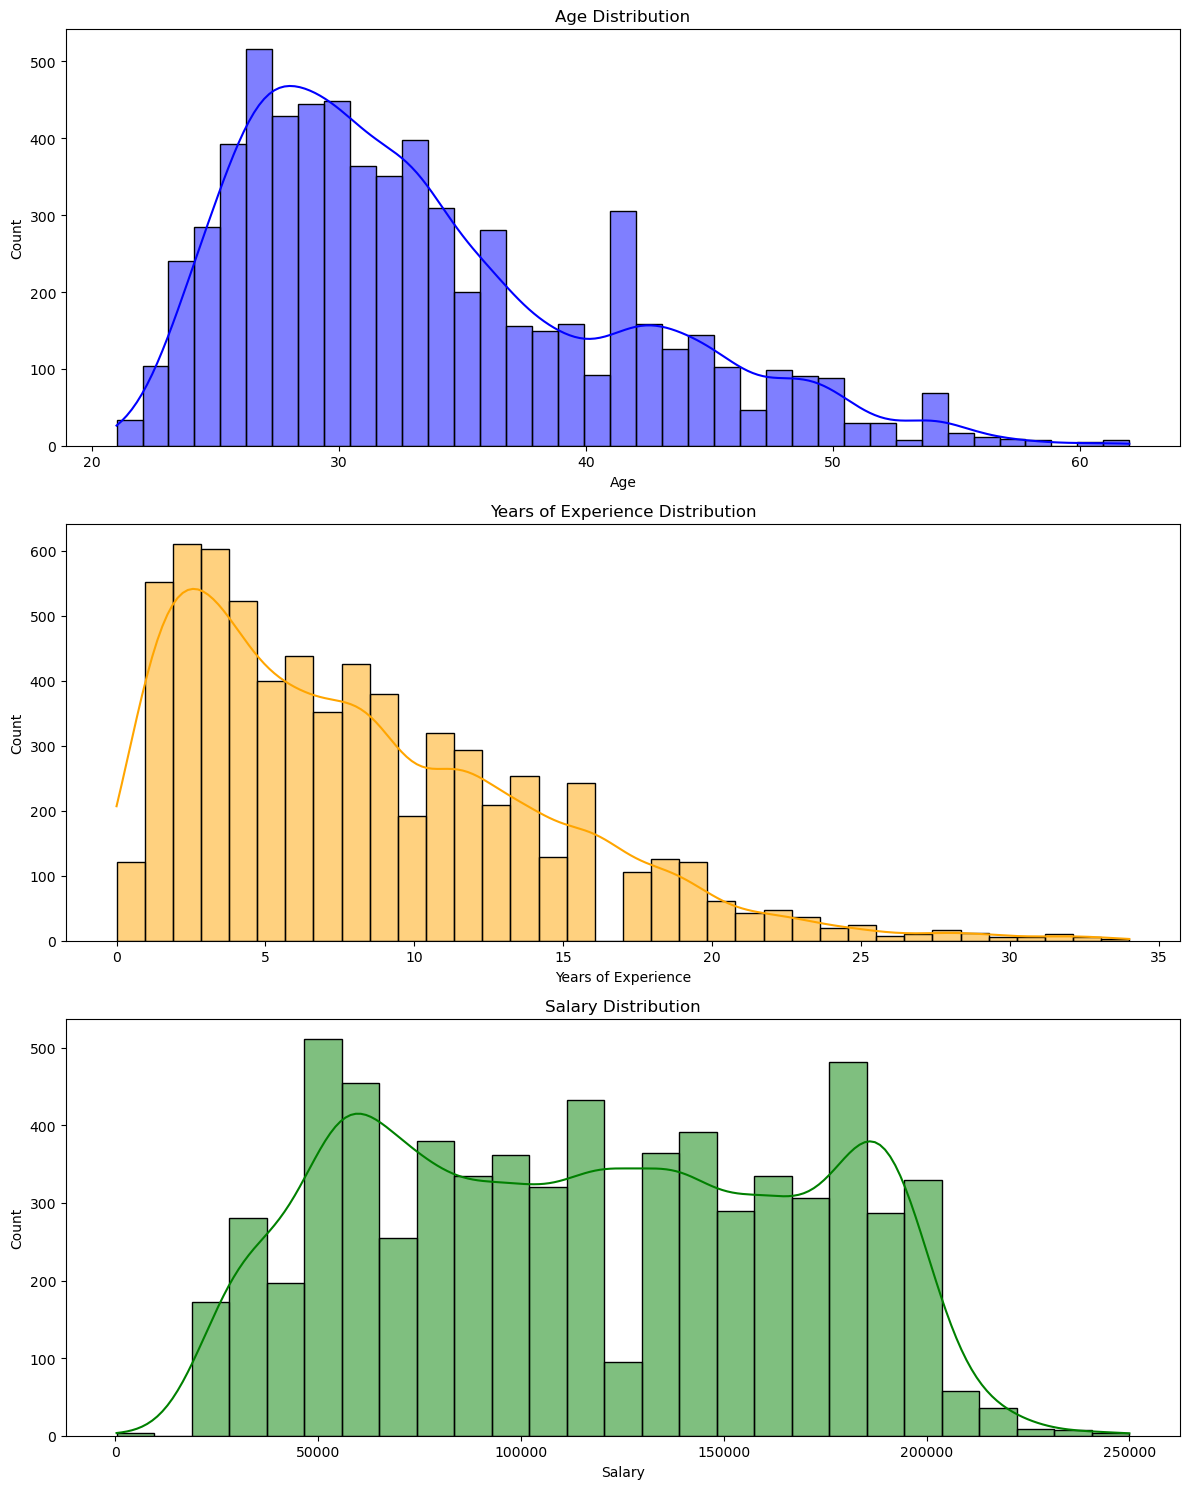

In [15]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Years of Experience'], ax=ax[1], color='orange', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()

**Distribution of continuous variables**
    
1. **Age Distribution:** It shows that majority of workforce lies in the 27-31 age range which suggests a highly youthful workforce.
    
2. **Years of Experience Distribution:** The plot shows that maximum workforce has 1-4 years of experience which is in agreement with previous results. Younger workforce has less experience than older counterparts
    
3. **Salary Distribution:** The salary majority of workers earn lies in 50,000-60,000 dollars range while similar count of people earn 1,80,000 as well. The plot reveals that there is a lot of different pay ranges within the community with majority of workers earning less than 1,25,000 dollars yearly.


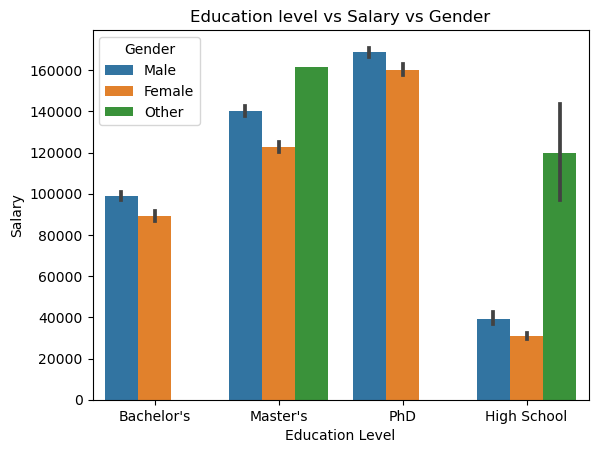

In [16]:
sns.barplot(x='Education Level',y='Salary',data=df,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

**Relationship between Education Level, Salary and Gender**

Following trends from previous charts, men on an average are paid more than women with same education level. Where the third gender is present, they are paid more than both the genders. Also, the more you are educated, the more you are paid.

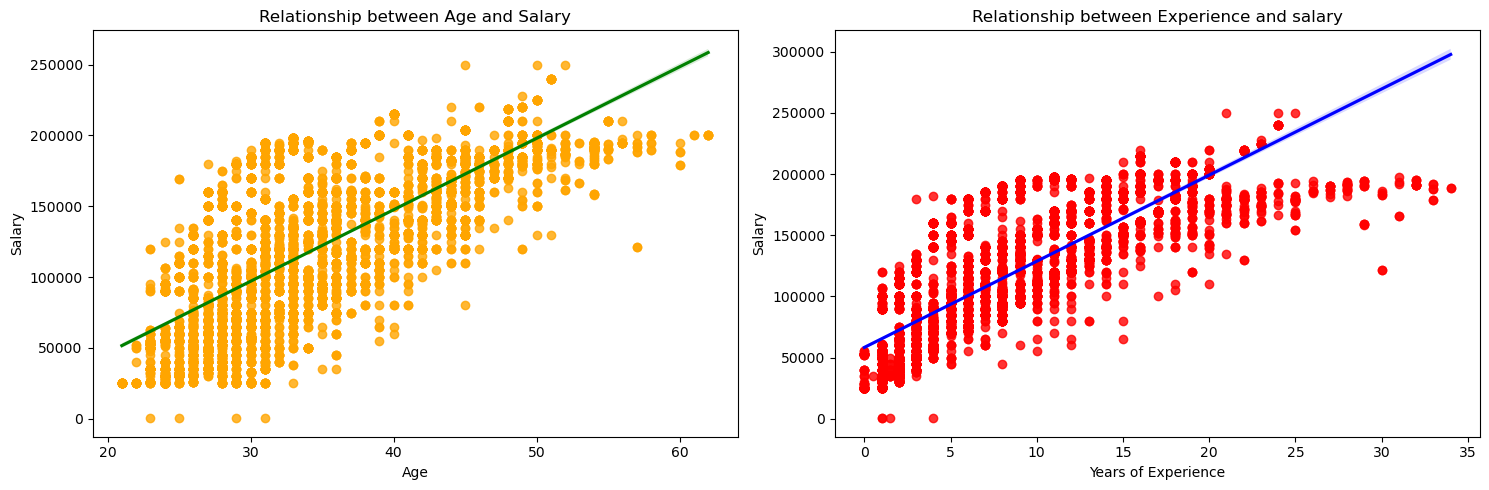

In [17]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()

1. **Relationship between Age and Salary:** The is strong positive correlation between age and salary meaning older employees get paid more than younger e,ployees.

2. **Relationship between Experience and Salary:** There is strong positive correlation between Experience and salary meaning experienced candidates get paid more. The more experience a candidate gains, the more their salary will become.


**Predicting Salary**

3 Models will be used to predict the salary

1. Linear Regression
2. Deision Tree
3. Random Forest

In [18]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [19]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q3**

In [20]:
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q1**

<h2>Preparing the data for ML analysis by converting categorical job titles into a numerical format<h2>

In [21]:
label_encoder = LabelEncoder()
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}) 

In [22]:
# Separating the dataset into features and target

# Dataset conntaining all features from df
X = df.drop('Salary',axis=1)

# Series containing target variable to be predicted
y = df['Salary']

In [23]:
# Splitting data into 25% training and 75% test sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape

(4688, 5)

In [24]:
print(X_train.isna().sum())

Age                     0
Gender                 11
Education Level         0
Job Title               0
Years of Experience     0
dtype: int64


In [25]:
X_train = X_train.dropna()
y_train = y_train[X_train.index] 
X_train.fillna(X_train.mean(), inplace=True)  
X_test.fillna(X_test.mean(), inplace=True)

In [26]:
print(X_train.isna().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
dtype: int64


In [27]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Lasso Regression': Lasso(),
    'LightGBM': lgb.LGBMRegressor()
}

In [28]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE
    explained_variance = explained_variance_score(y_test, y_pred)  # Explained Variance Score

    # Output results
    print(f"{name} Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")  # RMSE
    print(f"Mean Absolute Percentage Error: {mape:.2f}%")  # MAPE
    print(f"Explained Variance Score: {explained_variance}")  # Explained Variance Score
    print(f"R^2 Score: {r2}\n")
    print("-----------------------------------------\n")

Training Linear Regression...
Linear Regression Performance:
Mean Squared Error: 926576326.7031866
Mean Absolute Error: 23944.854444923152
Root Mean Squared Error: 30439.716271726098
Mean Absolute Percentage Error: 32.96%
Explained Variance Score: 0.6736777576655484
R^2 Score: 0.6736073889153507

-----------------------------------------

Training Decision Tree...
Decision Tree Performance:
Mean Squared Error: 108415933.59402563
Mean Absolute Error: 3382.2984135826846
Root Mean Squared Error: 10412.297229431439
Mean Absolute Percentage Error: 8.24%
Explained Variance Score: 0.9618097738183627
R^2 Score: 0.9618097736482865

-----------------------------------------

Training Random Forest...
Random Forest Performance:
Mean Squared Error: 80599320.2095935
Mean Absolute Error: 3488.0914840490727
Root Mean Squared Error: 8977.712415175343
Mean Absolute Percentage Error: 8.41%
Explained Variance Score: 0.9716169527731129
R^2 Score: 0.9716083588402707

---------------------------------------

## Residual Plots for the two best performing algorithms:

In [29]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

residuals_rf = y_test - y_pred_rf

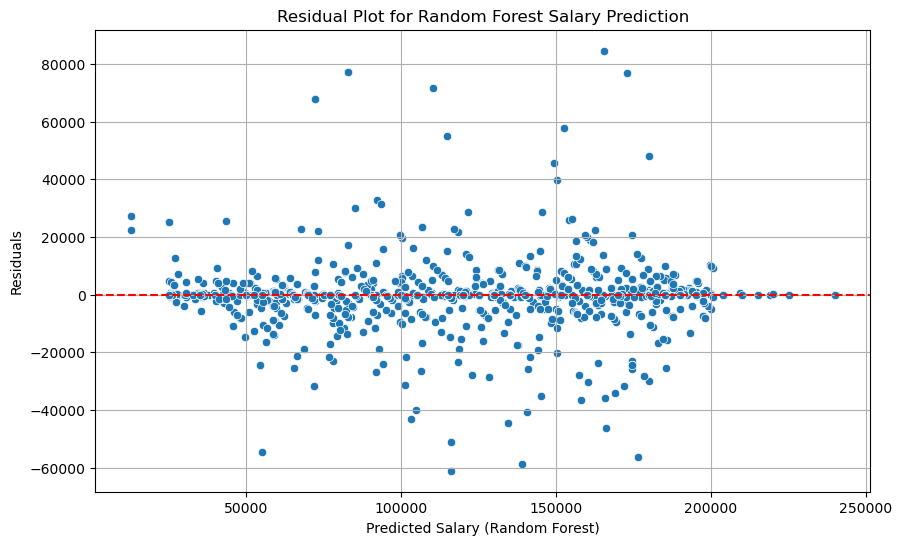

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Salary (Random Forest)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Salary Prediction')
plt.grid()
plt.show()

In [31]:
lightgbm_model = lgb.LGBMRegressor()
lightgbm_model.fit(X_train, y_train)
y_pred_lgbm = lightgbm_model.predict(X_test)

residuals_lgbm = y_test - y_pred_lgbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 4677, number of used features: 5
[LightGBM] [Info] Start training from score 115366.659397


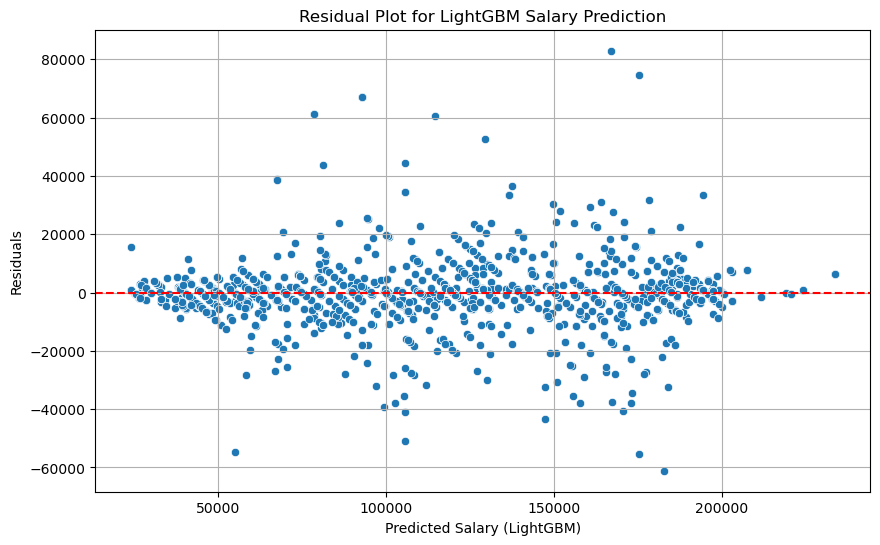

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lgbm, y=residuals_lgbm)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Salary (LightGBM)')
plt.ylabel('Residuals')
plt.title('Residual Plot for LightGBM Salary Prediction')
plt.grid()
plt.show()

**A bar chart depicting the importance of different features in predicting salary.**

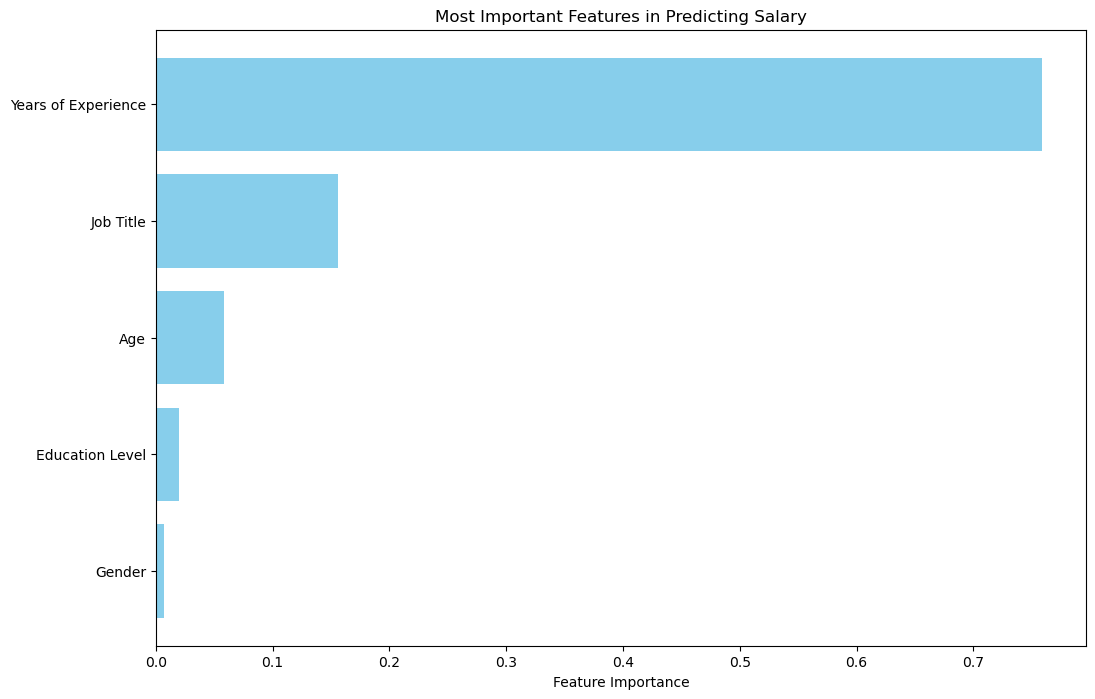

In [33]:
# Access the feature importances of the Random Forest Regressor
feature_importances = models['Random Forest'].feature_importances_

# Assuming you have a DataFrame 'X_train' with feature names
feature_names = list(X_train.columns)

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar chart for the top 10 feature importances
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names[:10], sorted_feature_importances[:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Most Important Features in Predicting Salary')
plt.gca().invert_yaxis() 
plt.show()

## Actual vs. Predicted Salary

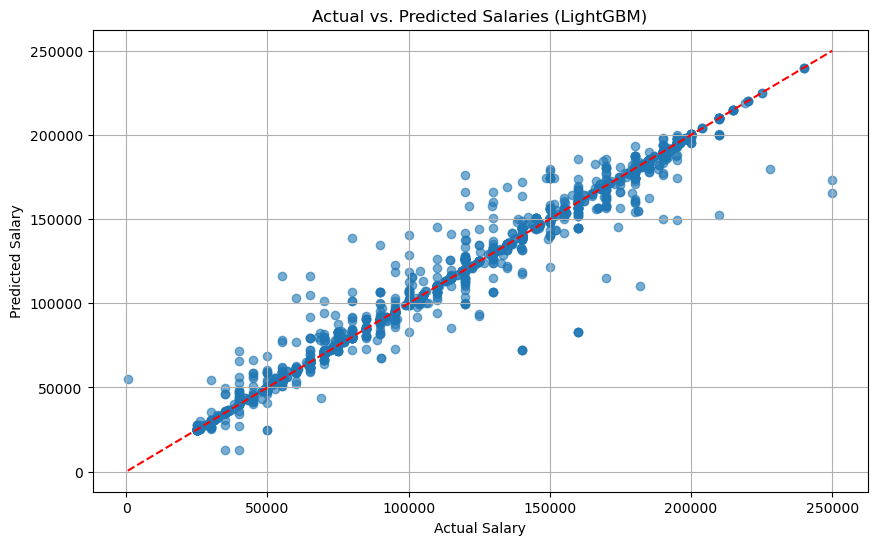

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries (LightGBM)')
plt.grid()
plt.show()

## QQ Plot

<Figure size 1000x600 with 0 Axes>

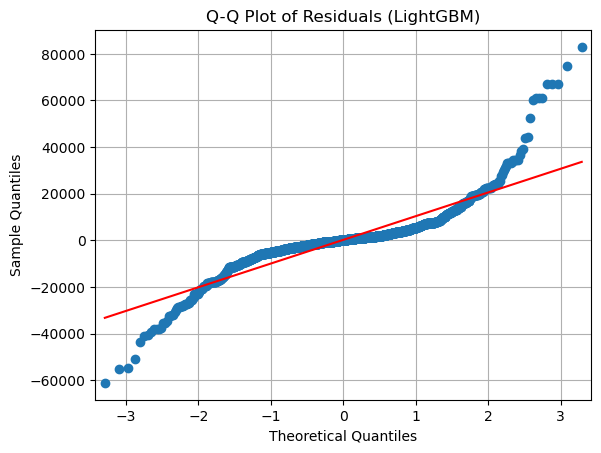

In [35]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_lgbm, line='s')
plt.title('Q-Q Plot of Residuals (LightGBM)')
plt.grid()
plt.show()

<h2>Conclusion<h2>

**1. The Random Forest model demonstrated the highest R-squared score of 0.971, along with the lowest Mean Squared Error (MSE) of 81,133,639.07 and Mean Absolute Error (MAE) of 3,480.71. This indicates its strong predictive performance, making it the best model among those tested.**

**2. The Decision Tree model also performed well, achieving an R-squared score of 0.961. However, it exhibited a higher MSE (109,463,767.14) and MAE (3,505.79) compared to the Random Forest model, indicating slightly less accuracy.**

**3. The LightGBM model achieved an R-squared score of 0.964, with an MSE of 103,256,579.09 and an MAE of 5,826.86. While it performed well, it still fell short of the Random Forest’s predictive capability.**

**4. The Lasso Regression model and Linear Regression model had the lowest R-squared scores of 0.674 and exhibited significantly higher error metrics (MSE: 926,579,620.73 for Lasso and 926,576,326.70 for Linear Regression). This suggests that these models are less effective in capturing the underlying patterns in the data.**

In conclusion, the Random Forest model appears to be the most suitable for predicting salaries in this dataset, as it offers the highest predictive accuracy and the lowest error metrics. Further optimization and fine-tuning of the Random Forest model could potentially lead to even better results.